# Query.py Tutorial Doc

This tutorial shows you how to create, run, and make some basic plots from the DP1 and DP03 catalogs. 

The tutorial is split into two parts:
1. Creating and running queries
2. Plotting/summary print statements

For this tutotial, we'll be looking NEO objects. query.py contains a global dictionary that contains all searchable classes and their orbital parameters:

    "LPC": {"a_min": 50.0},
    "TNO": {"a_min": 30.1, "a_max": 50.0},
    "Ntrojan": {"a_min": 29.8, "a_max": 30.4},
    "NEO": {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0},
    "MBA": {"q_min": 1.66, "a_min": 2.0, "a_max": 3.2},
    "Centaur": {"a_min": 5.5, "a_max": 30.1},
    "Jtrojan": {"a_min": 4.8, "a_max": 5.4, "e_max": 0.3},
    "JFC": {"tj_min": 2.0, "tj_max": 3.0}

The 'catalog' variable allows you to query different catalogs; the options are 'dp03_catalogs_10yr' and'dp1'.

The 'join' variable allows you to perform an inner join with either 'DiaSource' or 'SSObject'.

## 1. Creating and Running queries

First, we will show you a full example, and then provide more query examples for your reference. 

The first set of examples will use DP1. The examples at the bottom will use DP03. 

In [1]:
from lsst.rsp import get_tap_service
import sys
import os
sys.path.append(os.path.abspath('../../sso_query/'))
import query as q
import plots as p
import pandas as pd

After generating your desired query, it's time to run it. All examples can be run by uncommeting the 'q.run_query' line of code. 

The run_query function can return either an AstroPy table (to_pandas = False) or a Pandas dataframe (to_pandas = True). 

The function automatically prints the first few rows of your data. 

### Full example: DP03, combined NEO and LPC, joined with DiaSource

In [2]:
# create the query
NEO_string, NEO_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "DiaSource", limit = 1000)
print(NEO_string)
LPC_string, LPC_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "LPC", cutoffs = None, join = "DiaSource", limit = 1000)
print(LPC_string)

# run the query
NEO_data_table = q.run_query(NEO_string, NEO_class_name, "dp03_catalogs_10yr", to_pandas = True)
LPC_data_table = q.run_query(LPC_string, LPC_class_name, "dp03_catalogs_10yr", to_pandas = True)

main_example_table = p.combine_tables(NEO_data_table, LPC_data_table)

Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0
    LIMIT 1000;
Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q/(1-mpc.e) > 50.0
    LIMIT 1000;
Job phase is COMPLETED


,band,e,incl,magTrueVband,mpcDesignation,q,ssObjectID,a,class_name
0,i,0.523604,69.395390,23.082520,S00006wF,0.571882,2613353334478745188,1.200433,NEO
1,i,0.523604,69.395390,23.326107,S00006wF,0.571882,2613353334478745188,1.200433,NEO
2,r,0.523604,69.395390,24.481003,S00006wF,0.571882,2613353334478745188,1.200433,NEO
3,r,0.523604,69.395390,23.327765,S00006wF,0.571882,2613353334478745188,1.200433,NEO
4,i,0.523604,69.395390,24.400173,S00006wF,0.571882,2613353334478745188,1.200433,NEO
5,i,0.523604,69.395390,23.604431,S00006wF,0.571882,2613353334478745188,1.200433,NEO
6,r,0.523604,69.395390,23.603251,S00006wF,0.571882,2613353334478745188,1.200433,NEO
7,r,0.523604,69.395390,23.080896,S00006wF,0.571882,2613353334478745188,1.200433,NEO
8,r,0.704903,29.445729,23.703753,S000038X,0.550120,2614200694644067190,1.864199,NEO
9,r,0.704903,29.445729,23.719635,S000038X,0.550120,2614200694644067190,1.864199,NEO


Job phase is COMPLETED


,band,e,incl,magTrueVband,mpcDesignation,q,ssObjectID,a,class_name
0,i,0.285562,4.168718,23.692589,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
1,g,0.285562,4.168718,23.567230,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
2,r,0.285562,4.168718,23.518368,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
3,r,0.285562,4.168718,23.642958,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
4,r,0.285562,4.168718,23.676399,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
5,i,0.285562,4.168718,23.555323,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
6,g,0.285562,4.168718,23.518461,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
7,r,0.285562,4.168718,23.607063,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
8,r,0.285562,4.168718,23.629076,SS0000gh,37.589532,2624871150760808050,52.614107,LPC
9,g,0.285562,4.168718,23.584341,SS0000gh,37.589532,2624871150760808050,52.614107,LPC


### Full example: DP03, NEO, joined with SSObject

In [2]:
# create the query
NEO_string, NEO_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "SSObject")
print(f"\nQuery:\n{NEO_string}")

# run the query
NEO_data_table = q.run_query(NEO_string, NEO_class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
Job phase is COMPLETED


,discoverySubmissionDate,e,g_H,g_r_color,i_H,incl,mpcDesignation,numObs,q,r_H,r_i_color,ssObjectID,a,class_name
0,60747.0,0.396081,13.476295,0.669659,12.608139,8.45061,1929 SH,59,1.123543,12.806637,0.198498,3351269693330531197,1.860420,NEO
1,60219.0,0.435987,18.141359,0.641882,17.297379,11.88325,1932 EA1,282,1.080947,17.499477,0.202099,-5234750409166262016,1.916528,NEO
2,60422.0,0.763999,19.550732,0.634323,18.710812,1.32170,1936 CA,254,0.441069,18.916409,0.205597,7991128850154218427,1.868924,NEO
3,60560.0,0.623179,18.261578,0.624949,17.455847,6.06758,1937 UB,156,0.622294,17.636629,0.180782,-7789613295760699323,1.651432,NEO
4,60224.0,0.712520,16.118109,0.659043,15.249735,2.52162,1947 XC,321,0.625595,15.459065,0.209331,8551587316774204226,2.176135,NEO
5,60236.0,0.436676,15.087029,0.661860,14.244156,9.38260,1948 OA,306,0.769900,14.425168,0.181012,-2686348740622689257,1.366710,NEO
6,62611.0,0.826915,17.456528,0.659622,16.667896,22.79956,1949 MA,240,0.186402,16.796906,0.129009,-4973461691235584486,1.076942,NEO
7,63488.0,0.506705,18.075974,0.659075,17.227503,12.17004,1950 DA,86,0.834799,17.416899,0.189396,-380759069841638484,1.692293,NEO
8,60276.0,0.487689,15.452276,0.647643,14.605020,52.09591,1950 KA,474,1.125272,14.804633,0.199614,-1854470688567756410,2.196461,NEO
9,61740.0,0.365596,14.528775,0.641419,13.706590,26.86821,1950 LA,193,1.083856,13.887356,0.180766,7033084508252373249,1.708465,NEO


In [3]:
LPC_string, LPC_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "LPC", cutoffs = None, join = "SSObject")
print(f"\nQuery:\n{LPC_string}")
LPC_data_table = q.run_query(LPC_string, LPC_class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q/(1-mpc.e) > 50.0;
Job phase is COMPLETED


,discoverySubmissionDate,e,g_H,g_r_color,i_H,incl,mpcDesignation,numObs,q,r_H,r_i_color,ssObjectID,a,class_name
0,60651.00000,0.241889,NaN,NaN,NaN,0.24548,1995 TL8,146,40.108974,NaN,NaN,-7944525109453944452,52.906462,LPC
1,60283.00000,0.583744,NaN,NaN,NaN,23.94357,1996 TL6,206,34.990001,NaN,NaN,-6402520081534125032,84.058927,LPC
2,60326.00000,0.416044,NaN,NaN,NaN,6.66065,1998 XY9,170,37.280751,NaN,NaN,6324308877180675314,63.841724,LPC
3,60752.00000,0.671871,NaN,NaN,NaN,27.80716,1999 CZ1,169,37.473294,NaN,NaN,-6226453271022381647,114.203063,LPC
4,60423.00000,0.253008,NaN,NaN,NaN,17.24666,1999 HW1,100,39.103885,NaN,NaN,-4645018287656921967,52.348484,LPC
5,61460.00000,0.388323,NaN,NaN,NaN,19.71189,2000 CQ1,251,34.501959,NaN,NaN,7472096793441060043,56.405525,LPC
6,61283.00000,0.508512,NaN,NaN,NaN,8.04635,2000 PH3,140,38.322209,NaN,NaN,4353850515725095742,77.971818,LPC
7,60281.00000,0.527686,NaN,NaN,NaN,7.85985,2000 YY1,379,29.869348,NaN,NaN,5231994874203142679,63.240505,LPC
8,60392.00000,0.613130,NaN,NaN,NaN,12.74053,2001 FZ1,289,32.401190,NaN,NaN,112273187498824986,83.752074,LPC
9,61166.00000,0.504241,NaN,NaN,NaN,15.34429,2001 KV7,373,34.347340,NaN,NaN,7563231297313977603,69.282354,LPC


### DP1 Examples
Because SSObject is a one-to-one match to the MPCORB catalog and DiaSource has multiple observations per object, note that the SSObject query will run much faster than the DiaSource query. 

When joining with DiaSource and SSObject, note the columns. Both tables have different columns in the DP03 and DP1 catalogs, be careful of this when plotting!

##### Ex 1: Class name provided, join with SSObject

In [5]:
string, class_name = q.make_query(catalog = "dp1", class_name = "NEO", cutoffs = None, join = "SSObject")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp1", to_pandas = True)

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 2: Class name provided, join with DiaSource

In [6]:
string, class_name = q.make_query(catalog = "dp1", class_name = None, cutoffs = {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0}, join = "DiaSource")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp1", to_pandas = True)

Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


### DP03 Examples

##### Ex 1: DP03, Class name provided, no join. 

In [7]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = None)
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 2: DP03, Class name provided, join table with DiaSource

In [8]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "DiaSource")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 3: DP03, Cutoffs provided, no join

In [9]:
NEO_cutoffs = {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0}

string, class_name = q.make_query("dp03_catalogs_10yr", class_name = None, cutoffs = NEO_cutoffs, join = None)
print(string)
print(class_name)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
NEO


##### Ex 4: DP03, Cutoffs provided, join with SSObject

In [10]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = None, cutoffs = NEO_cutoffs, join = "SSObject")
print(string)
print(class_name)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
NEO


## 2. Plotting + Summary Print Statements

The query_helpers.py module holds functions that create some useful summary plots and print statements. For our examples, we'll be looking at NEOs in the DP1 catalog. 

##### a vs. e, a vs. i

Columns: ['band', 'e', 'incl', 'magTrueVband', 'mpcDesignation', 'q', 'ssObjectID', 'a', 'class_name']


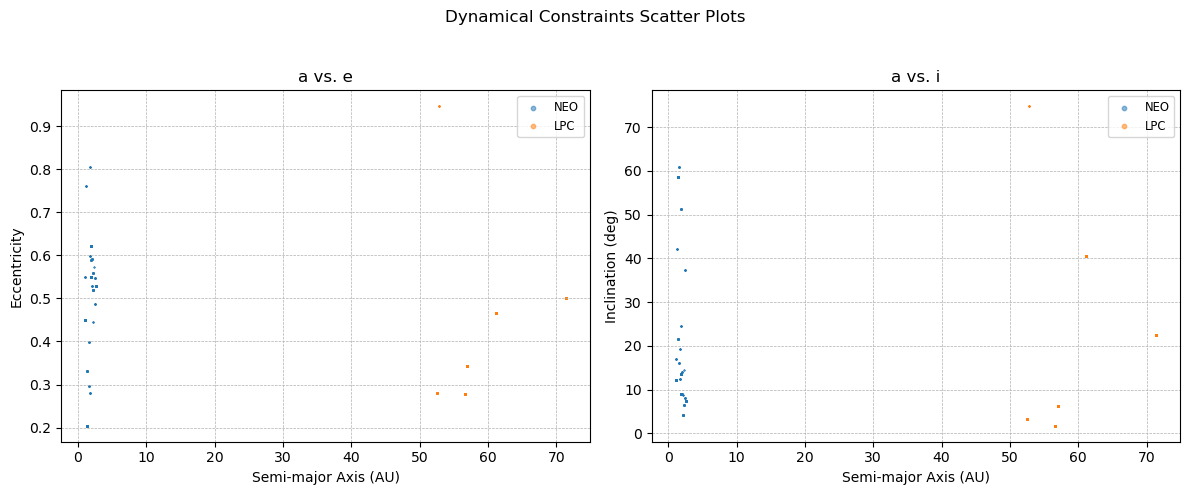

In [13]:
print(f"Columns: {[col for col in main_example_table.columns]}")

# qh.plot_data(main_example_table, log = True)

p.run_scatter_plots(main_example_table)

##### Observations per object?

In [14]:
counts = p.type_counts(main_example_table)

class_name
NEO    1000
LPC    1000
Name: count, dtype: int64


### Joined with DiaSource

##### Observations per object, by filter:

In [15]:
observations_by_object_filter = p.obs_filter(main_example_table)

# of observations by Object: ssObjectID
2595398975434491598    297
2586660485395066384    258
2607128014695982887    239
2575246630191237038    140
2612405951996414448    116
2574086765666757145    103
2583838747025272861     97
2583289342068757575     94
2585161224744036510     85
2610898352830304638     75
2586322768051692593     64
2576897478891268113     55
2583815121558036181     47
2575434387163321615     43
2581243544310690991     39
2575645962438840349     27
2584495097712129717     27
2581552073391832300     26
2577725149814045401     21
2576410686833174564     20
2582261513497310913     20
2577326483407452053     18
2580157308553229257     17
2580421527090478352     17
2586070944851903057     15
2605665751575983294     15
2575210774508655542     10
2580997347692180536      9
2578916422107455935      6
Name: count, dtype: int64
# of observations by Filter: band
r    791
i    626
g    303
z    280
Name: count, dtype: int64
# of unique observations for each unique object, by fil

##### Magnitude Range plot:

In [16]:
NEO_ex_with_mags = p.data_grouped_mags(NEO_data_table)
p.mag_range_plot(NEO_ex_with_mags, head_number = 5)

LPC_ex_with_mags = p.data_grouped_mags(LPC_data_table)
p.mag_range_plot(LPC_ex_with_mags, head_number = 5)

KeyError: "Column(s) ['magTrueVband'] do not exist"

### Joined with SSObject


Color Distribution Plot (just NEOs):

In [4]:
print(f"Columns: {[col for col in NEO_data_table.columns]}\n")
counts = p.type_counts(NEO_data_table)

Columns: ['discoverySubmissionDate', 'e', 'g_H', 'g_r_color', 'i_H', 'incl', 'mpcDesignation', 'numObs', 'q', 'r_H', 'r_i_color', 'ssObjectID', 'a', 'class_name']

class_name
NEO    39470
Name: count, dtype: int64


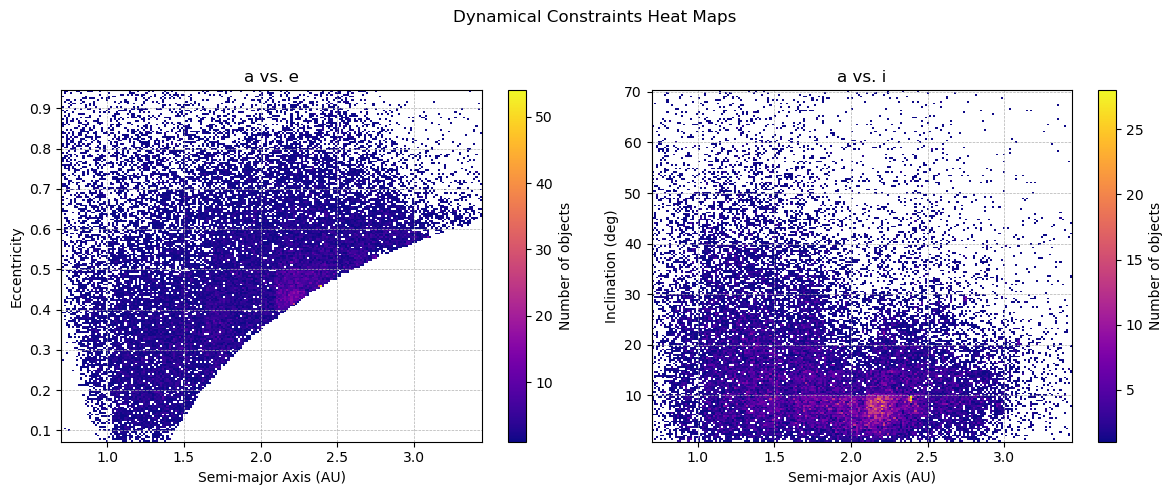

In [5]:
p.run_heat_maps(NEO_data_table)

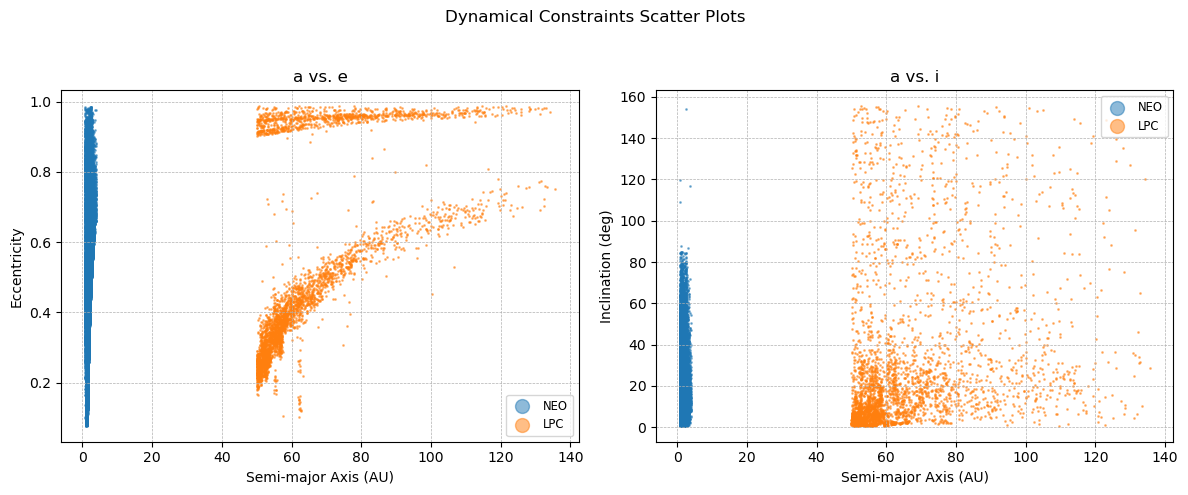

In [6]:
sso_example_table = p.combine_tables(NEO_data_table, LPC_data_table)
p.run_scatter_plots(sso_example_table)

**Notes:**
- Color graphs are only available in dp03 catalogs right now (check schema for updates)
- Default cutoff date between new discoveries and known objects is 06-30-2025, run_ssobject_plots has an optional argument discovery_cutoff (str) (eg. "2025-06-30")


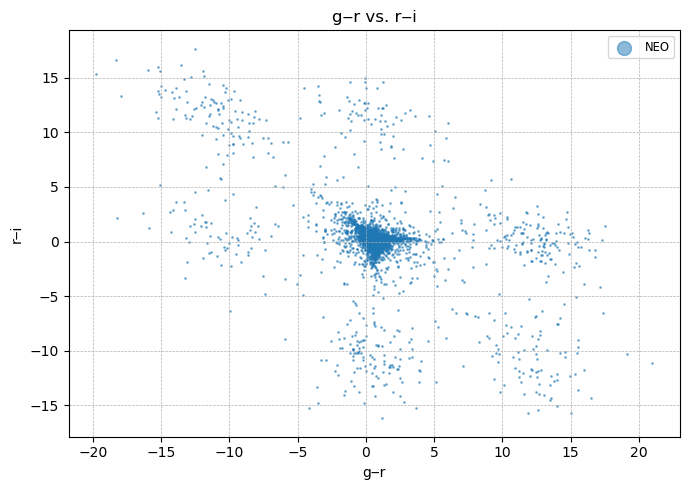

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 13095 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:138: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0].scatter(group["a"], group["e"], label="New" if is_new else "Known", alpha=0.5, s=5, c=color_map[is_new], marker=marker_map[is_new], edgecolor='k', linewidth=0.2)
/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:147: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[1].scatter(group["a"], group["incl"], label="New" if is_new else 

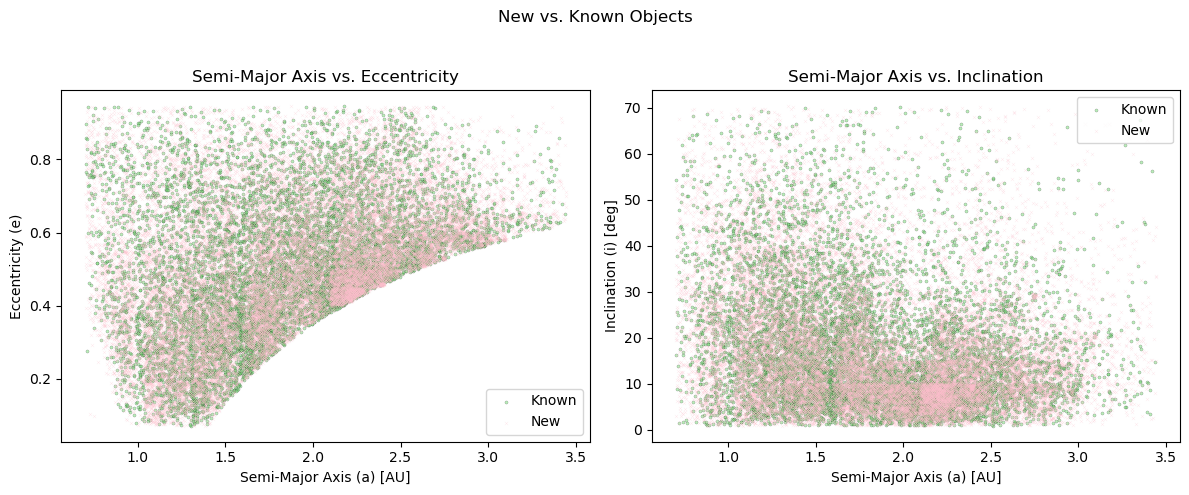

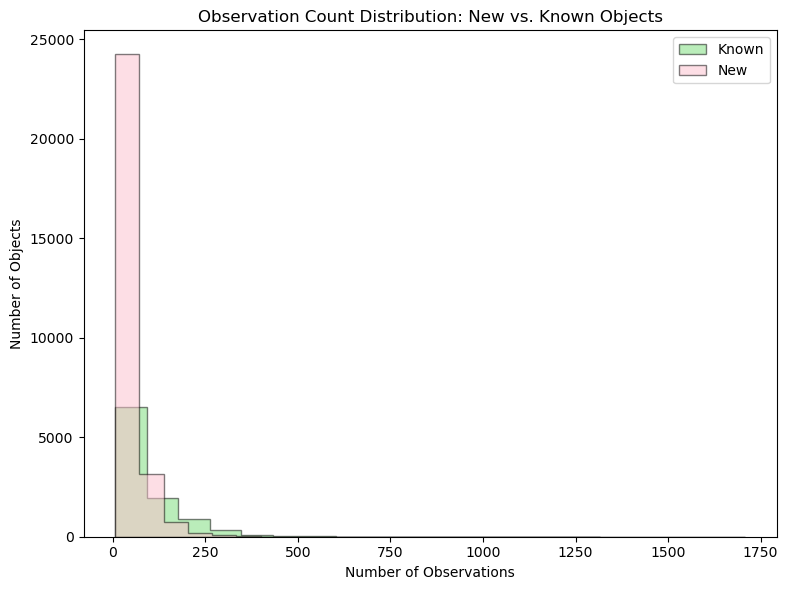

In [7]:
p.run_ssobject_plots(NEO_data_table) # This plot takes an optional argument for a date (str) to be the cutoff between a new and a known object (default: "2025-06-30"). 

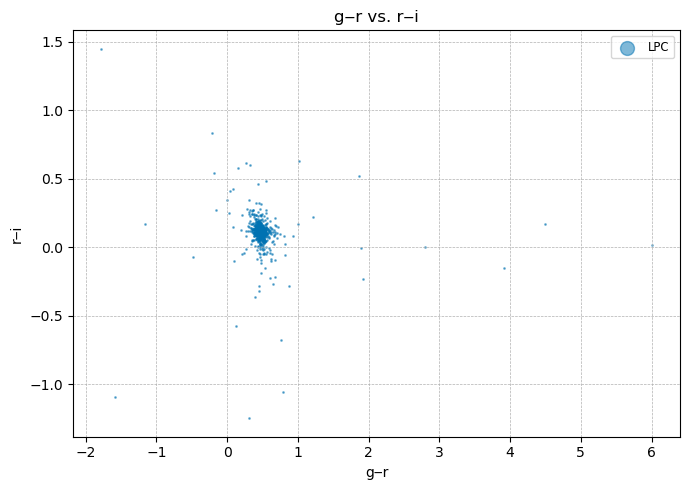

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 896 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:138: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0].scatter(group["a"], group["e"], label="New" if is_new else "Known", alpha=0.5, s=5, c=color_map[is_new], marker=marker_map[is_new], edgecolor='k', linewidth=0.2)
/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:147: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[1].scatter(group["a"], group["incl"], label="New" if is_new else "K

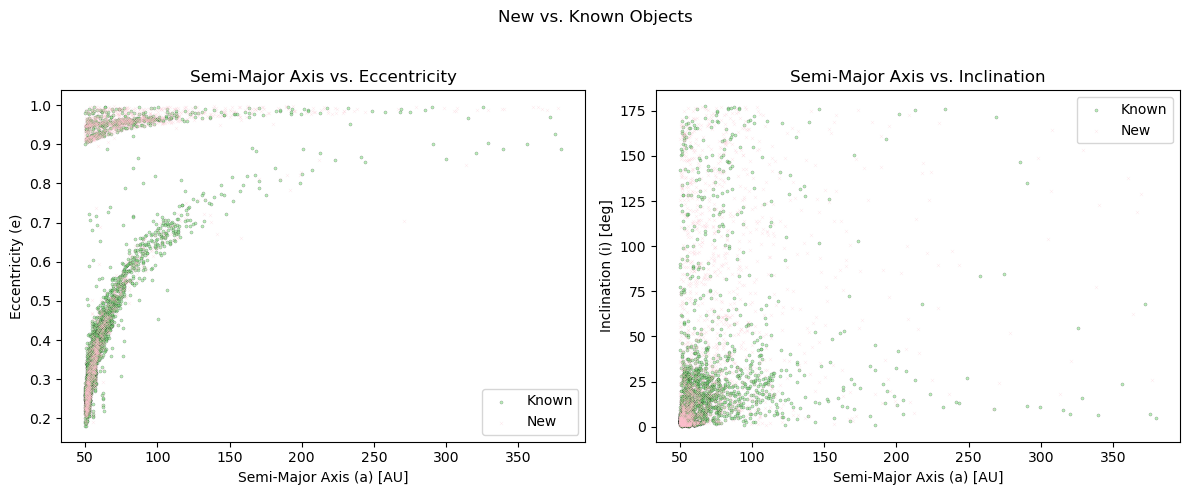

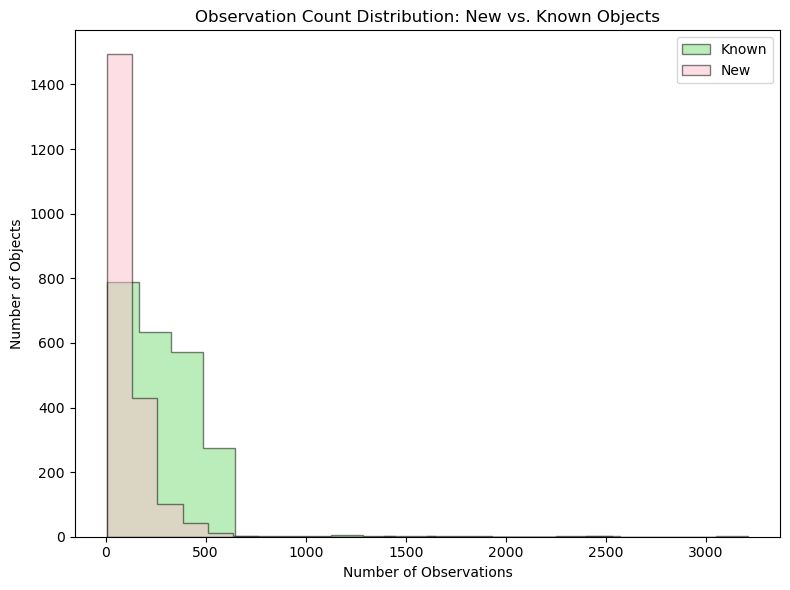

In [20]:
p.run_ssobject_plots(LPC_data_table)

In [9]:
# create the query
MBA_string, MBA_class_name = q.make_query(catalog = "dp1", class_name = "MBA", cutoffs = None, join = "SSObject")
print(f"\nQuery:\n{MBA_string}")

# run the query
MBA_data_table = q.run_query(MBA_string, MBA_class_name, "dp1", to_pandas = True)

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q > 1.66 AND mpc.q/(1-mpc.e) > 2.0 AND mpc.q/(1-mpc.e) < 3.2;
Job phase is COMPLETED


,discoverySubmissionDate,e,incl,mpcDesignation,numObs,q,ssObjectID,a,class_name
0,NaN,0.085083,6.172520,1981 EJ47,3,2.214434,20890932542191434,2.420366,MBA
1,NaN,0.123997,4.667199,1984 SO5,8,2.352472,20890945661711695,2.685462,MBA
2,NaN,0.156926,5.621222,1985 VD,6,2.652810,20890950007009348,3.146592,MBA
3,NaN,0.101921,4.840250,1985 VE,19,2.089647,20890950007009349,2.326797,MBA
4,NaN,0.115775,5.202303,1991 SJ,11,1.942957,20892032288436298,2.197356,MBA
5,NaN,0.233890,8.410585,1991 XC1,20,2.394301,20892032372322627,3.125272,MBA
6,NaN,0.131549,8.324338,1992 WM5,8,2.196971,20892036650513741,2.529758,MBA
7,NaN,0.259531,4.465311,1993 TR37,5,1.687654,20892040895346514,2.279169,MBA
8,NaN,0.036856,5.229717,1995 SP71,21,2.470180,20892049468764496,2.564704,MBA
9,NaN,0.063483,7.950412,1996 SH6,5,2.151422,20892053763274312,2.297258,MBA


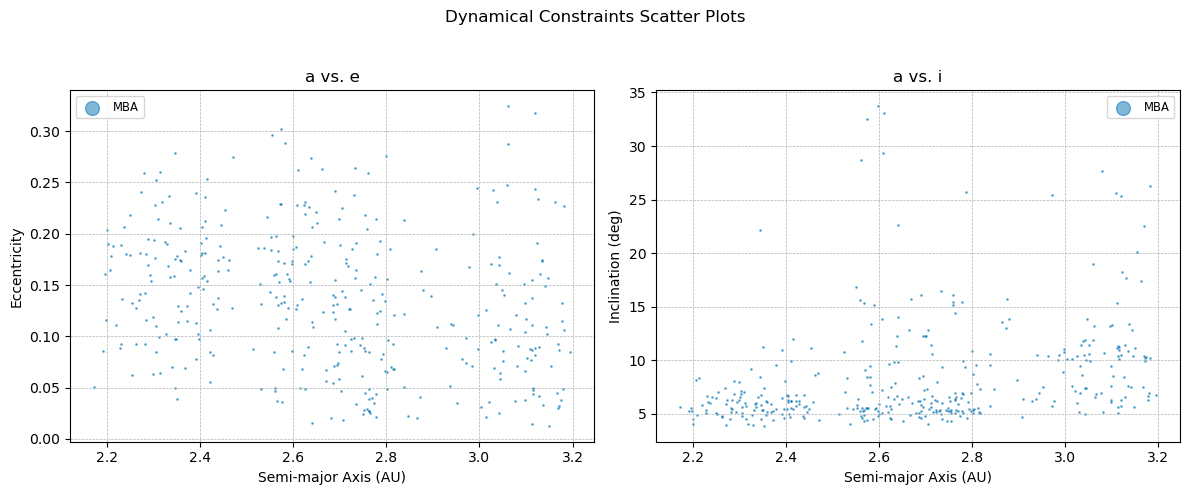

In [10]:
p.run_scatter_plots(MBA_data_table)

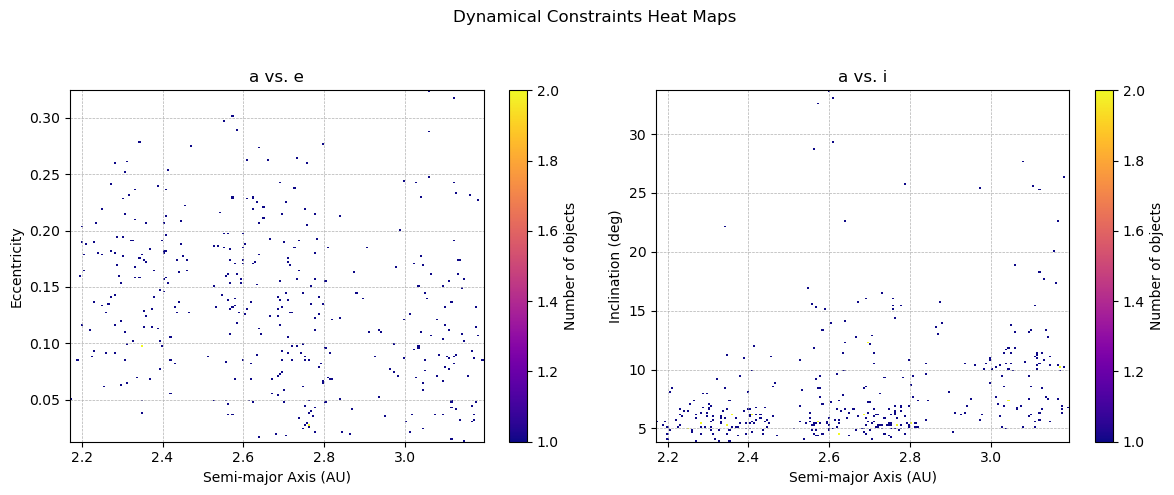

In [11]:
p.run_heat_maps(MBA_data_table)

/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:138: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0].scatter(group["a"], group["e"], label="New" if is_new else "Known", alpha=0.5, s=5, c=color_map[is_new], marker=marker_map[is_new], edgecolor='k', linewidth=0.2)
/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:147: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[1].scatter(group["a"], group["incl"], label="New" if is_new else "Known", alpha=0.5, s=5, c=color_map[is_new], marker=marker_map[is_new], edgecolor='k', linewidth=0.2)


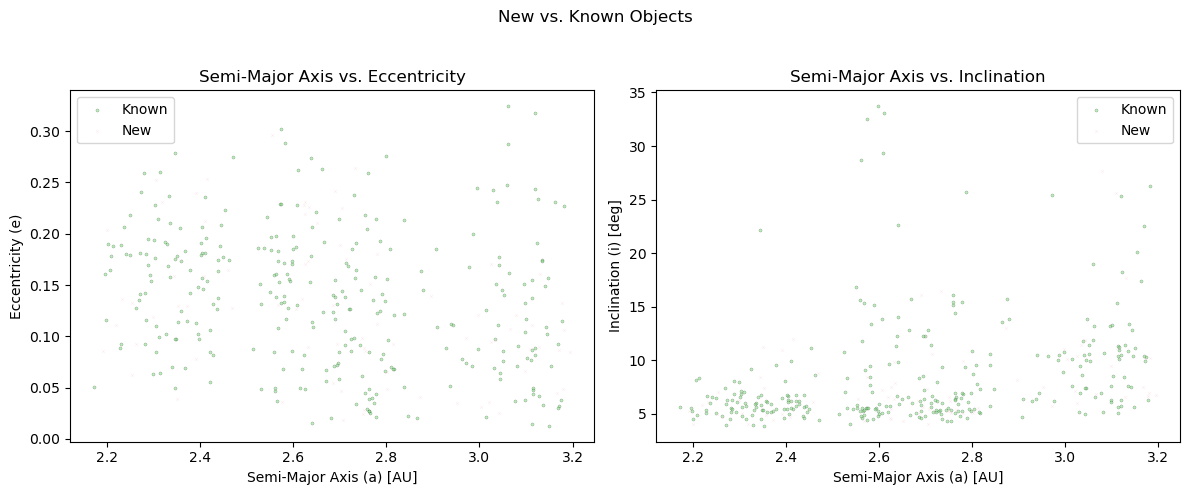

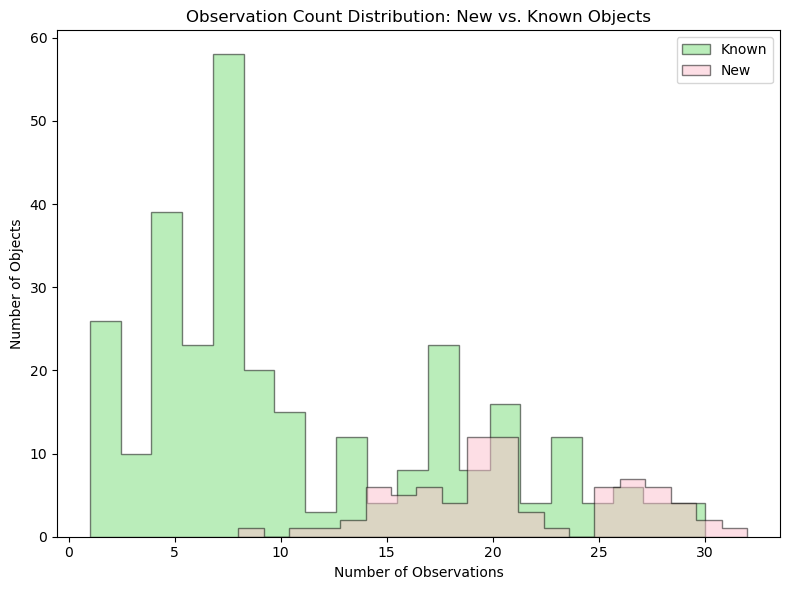

In [19]:
p.run_ssobject_plots(MBA_data_table)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:138: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0].scatter(group["a"], group["e"], label="New" if is_new else "Known", alpha=0.5, s=5, c=color_map[is_new], marker=marker_map[is_new], edgecolor='k', linewidth=0.2)
/home/norachasetatko/notebooks/rsp_queries/sso_query/plots.py:147: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[1].scatter(group["a"], group["incl"], label="New" if is_new else "Known", alpha=0.5, s=5, c=color_map[is_new], marker=marker_map[is_new], edgecolor='k', linewidth=0.2)


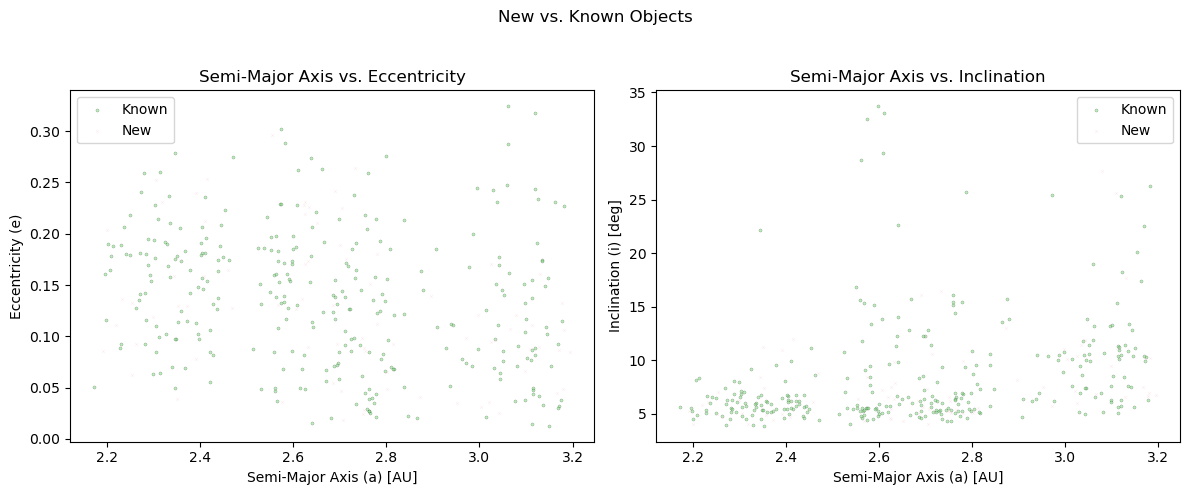

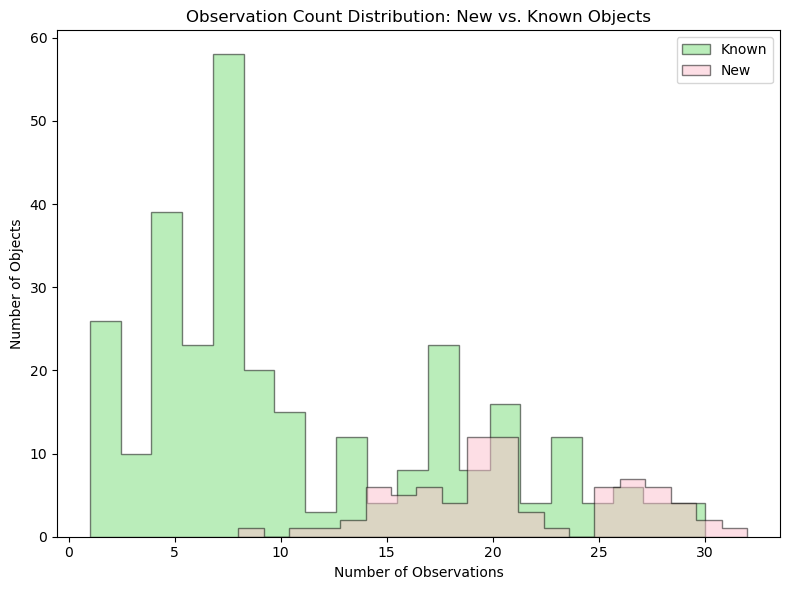

In [16]:
df = MBA_data_table
discovery_cutoff = '2025-06-20'
df = df.copy()


from astropy.time import Time
df = df.copy()
mask = df['discoverySubmissionDate'].notna()
mjd_values = df.loc[mask, 'discoverySubmissionDate'].astype(float)
converted_times = Time(mjd_values, format='mjd').to_datetime()
df['discoverySubmissionDate'] = df['discoverySubmissionDate'].astype('object')
df.loc[mask, 'discoverySubmissionDate'] = pd.Series(converted_times, index=mjd_values.index)
df['discoverySubmissionDate'] = pd.to_datetime(df['discoverySubmissionDate'], errors='coerce')
discovery_cutoff = pd.Timestamp(discovery_cutoff)
df['is_new'] = df['discoverySubmissionDate'] >= discovery_cutoff
print(df['is_new'])

p.run_ssobject_plots(MBA_data_table, discovery_cutoff='2025-06-20')

In [17]:
from IPython.display import display

pd.set_option('display.max_rows', None)  # Show all rows
display(MBA_data_table)

,discoverySubmissionDate,e,incl,mpcDesignation,numObs,q,ssObjectID,a,class_name
0,NaN,0.085083,6.172520,1981 EJ47,3,2.214434,20890932542191434,2.420366,MBA
1,NaN,0.123997,4.667199,1984 SO5,8,2.352472,20890945661711695,2.685462,MBA
2,NaN,0.156926,5.621222,1985 VD,6,2.652810,20890950007009348,3.146592,MBA
3,NaN,0.101921,4.840250,1985 VE,19,2.089647,20890950007009349,2.326797,MBA
4,NaN,0.115775,5.202303,1991 SJ,11,1.942957,20892032288436298,2.197356,MBA
5,NaN,0.233890,8.410585,1991 XC1,20,2.394301,20892032372322627,3.125272,MBA
6,NaN,0.131549,8.324338,1992 WM5,8,2.196971,20892036650513741,2.529758,MBA
7,NaN,0.259531,4.465311,1993 TR37,5,1.687654,20892040895346514,2.279169,MBA
8,NaN,0.036856,5.229717,1995 SP71,21,2.470180,20892049468764496,2.564704,MBA
9,NaN,0.063483,7.950412,1996 SH6,5,2.151422,20892053763274312,2.297258,MBA
